In [1]:
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix, csc_matrix
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import pandas as pd


In [2]:
os.chdir('/dfs7/swaruplab/smorabit/analysis/ADDS_2021/visium/5xFAD/')
data_dir = 'data/'
fig_dir = 'figures/'


In [4]:
# load counts matrix
X = io.mmread('data/5xFAD_seurat_processed_counts.mtx')


In [5]:
X = coo_matrix.tocsc(X)

In [6]:
X = csc_matrix.transpose(X)

In [24]:
# load the metadata
obs = pd.read_csv('data/5xFAD_seurat_processed_meta.tsv', sep='\t')

obs['Slide'] = obs.Slide.astype('category')

obs.head()

/tmp/smorabit/25517278/ipykernel_839556/2029309568.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  obs = pd.read_csv('data/5xFAD_seurat_processed_meta.tsv', sep='\t')


,orig.ident,nCount_Spatial,nFeature_Spatial,SampleID,SAMPLE,Condition,Age,seqbatch,Sex,CaptureArea,...,annotation,row,col,imagerow,imagecol,DOB,Sack.date,Cage.No,Group,SlideSerial
AAACAAGTATCTCCCA-1_1_1,SeuratProject,974,638,241.0,241,WT,4mo,Pilot_2021,F,C1,...,ctx-deep-layers,150,252,4911,9575,2/6/20,6/4/20,2.4,4mo-WT,V10M17-063
AAACAGTGTTCCTGGG-1_1_1,SeuratProject,1731,984,241.0,241,WT,4mo,Pilot_2021,F,C1,...,ctx-olfactory,173,193,9443,12671,2/6/20,6/4/20,2.4,4mo-WT,V10M17-063
AAACATTTCCCGGATT-1_1_1,SeuratProject,1941,1108,241.0,241,WT,4mo,Pilot_2021,F,C1,...,ctx-olfactory,161,247,5291,11050,2/6/20,6/4/20,2.4,4mo-WT,V10M17-063
AAACCCGAACGAAATC-1_1_1,SeuratProject,4018,1762,241.0,241,WT,4mo,Pilot_2021,F,C1,...,ctx-upper-layers,145,265,3913,8902,2/6/20,6/4/20,2.4,4mo-WT,V10M17-063
AAACCGGGTAGGTACC-1_1_1,SeuratProject,1371,901,241.0,241,WT,4mo,Pilot_2021,F,C1,...,thalamus1,142,178,10612,8522,2/6/20,6/4/20,2.4,4mo-WT,V10M17-063


In [33]:
columns = ['nCount_Spatial', 'SAMPLE', 'Condition', 'Age', 'seqbatch', 'Sex', 'CaptureArea', 'SlideSerial', 'Sack.date', 'Cage.No', 'row', 'col', 'imagerow', 'imagecol', 'annotation']

In [34]:
var = pd.read_csv('/dfs7/swaruplab/smorabit/data/Visium_Mouse_2021/Nov_24_2021/spaceranger_count/Visium5xFAD_1/outs/filtered_feature_bc_matrix/features.tsv.gz', sep='\t', header=None)
var.columns = ['ensembl', 'gene_symbol', 'type']
var.index = var.gene_symbol.to_list()
var.head()


,ensembl,gene_symbol,type
Xkr4,ENSMUSG00000051951,Xkr4,Gene Expression
Gm1992,ENSMUSG00000089699,Gm1992,Gene Expression
Gm19938,ENSMUSG00000102331,Gm19938,Gene Expression
Gm37381,ENSMUSG00000102343,Gm37381,Gene Expression
Rp1,ENSMUSG00000025900,Rp1,Gene Expression


In [40]:
# make adata object
adata = anndata.AnnData(X=X, obs=obs[columns], var=var)
adata.var_names_make_unique()

/pub/smorabit/miniconda3/envs/scanpy/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [41]:
# pre-processing
adata.layers["counts"] = adata.X.copy() # preserve counts


In [42]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata 

In [43]:
# save the dataset for scDRS:
adata.write_h5ad('{}5xFAD_visium_scDRS.h5ad'.format(data_dir))

In [38]:
adata.obs.nCount_Spatial

AAACAAGTATCTCCCA-1_1_1       974
AAACAGTGTTCCTGGG-1_1_1      1731
AAACATTTCCCGGATT-1_1_1      1941
AAACCCGAACGAAATC-1_1_1      4018
AAACCGGGTAGGTACC-1_1_1      1371
                           ...  
TTGTTCAGTGTGCTAC-1_28_6     8217
TTGTTGTGTGTCAAGA-1_28_6     3384
TTGTTTCACATCCAGG-1_28_6    10404
TTGTTTCCATACAACT-1_28_6    13384
TTGTTTGTGTAAATTC-1_28_6     6332
Name: nCount_Spatial, Length: 212249, dtype: int64

In [39]:
# write the covariate table:
df_cov = adata.obs[['nCount_Spatial']]
df_cov.index = df_cov.index.rename('cell_id')
df_cov.to_csv('{}5xFAD_visium_scDRS_cov.tsv'.format(data_dir), sep='\t')

/pub/smorabit/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/pub/smorabit/miniconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/pub/smorabit/miniconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/pub/smorabit/miniconda3/envs/scanpy/lib/python3.11/site-packag

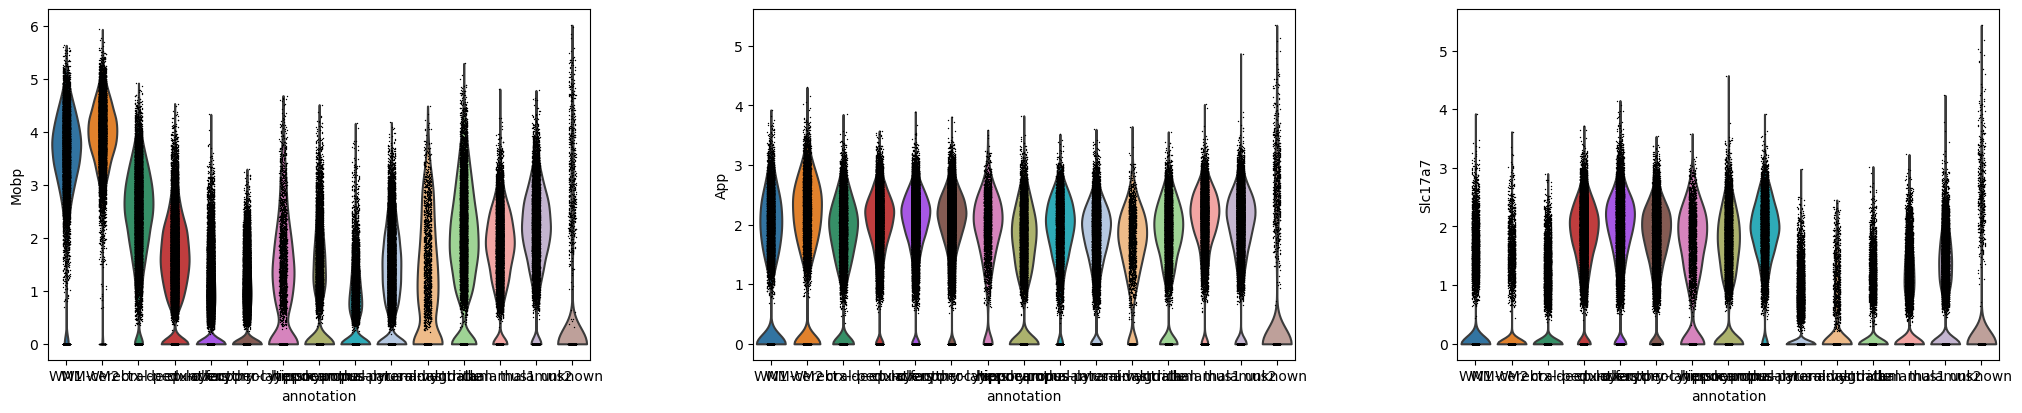

In [11]:
sc.pl.violin(adata, keys=['Mobp', 'App', 'Slc17a7'], groupby='annotation')

In [12]:
adata.write('data/5xFAD_seurat_processed.h5ad')

TypeError: Can't implicitly convert non-string objects to strings

Above error raised while writing key 'Slide' of <class 'h5py._hl.group.Group'> to /